In [2]:
import pandas as pd

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('final_completed_merged_data.csv')

# Define the columns that you want to consider for duplicates
columns_to_check = ['Label', 'Month', 'Year', 'Loan Rate', 'Election', 'Close (Rs.)', 'Inflation', 'Buy Rate']

# Remove duplicates based on the specified columns
df_no_duplicates = df.drop_duplicates(subset=columns_to_check)


df_no_duplicates 
# Group the data by "Label," "Year," and "Month" columns and count the occurrences
#grouped = df_no_duplicates.groupby(['Label']).size().reset_index(name='Count')
#grouped

# Filter the DataFrame to include only rows where Count is greater than 1
#filtered_grouped = grouped[grouped['Count'] > 1]
#filtered_grouped


Label  Year  Month  Loan Rate  Election  Close (Rs.)  Inflation  \
0       SUN.N0000  1990      3       18.7         0    12.500000       22.3   
1      GREG.N0000  1990      4       18.7         0     0.500000       22.6   
2      SELI.N0000  1991      1       19.3         0   550.000000       15.4   
3      SHAL.N0000  1991      2       19.3         0   575.000000       13.7   
4      KZOO.N0000  1991      4       19.3         0   125.000000       14.0   
...           ...   ...    ...        ...       ...          ...        ...   
41869  VPEL.N0000  2023      9       12.0         0     6.926316        1.3   
41870  WAPO.N0000  2023      9       12.0         0    35.342105        1.3   
41871  WATA.N0000  2023      9       12.0         0    75.357895        1.3   
41872  WIND.N0000  2023      9       12.0         0    18.768421        1.3   
41873  YORK.N0000  2023      9       12.0         0   155.403846        1.3   

       Buy Rate  
0       40.0200  
1       40.0200  
2       40.4000  
3       40.7200  
4       40.9400  
...         ...  
41869  317.5436  
41870  317.5436  
41871  317.5436  
41872  317.5436  
41873  317.5436  

[40144 rows x 8 columns]

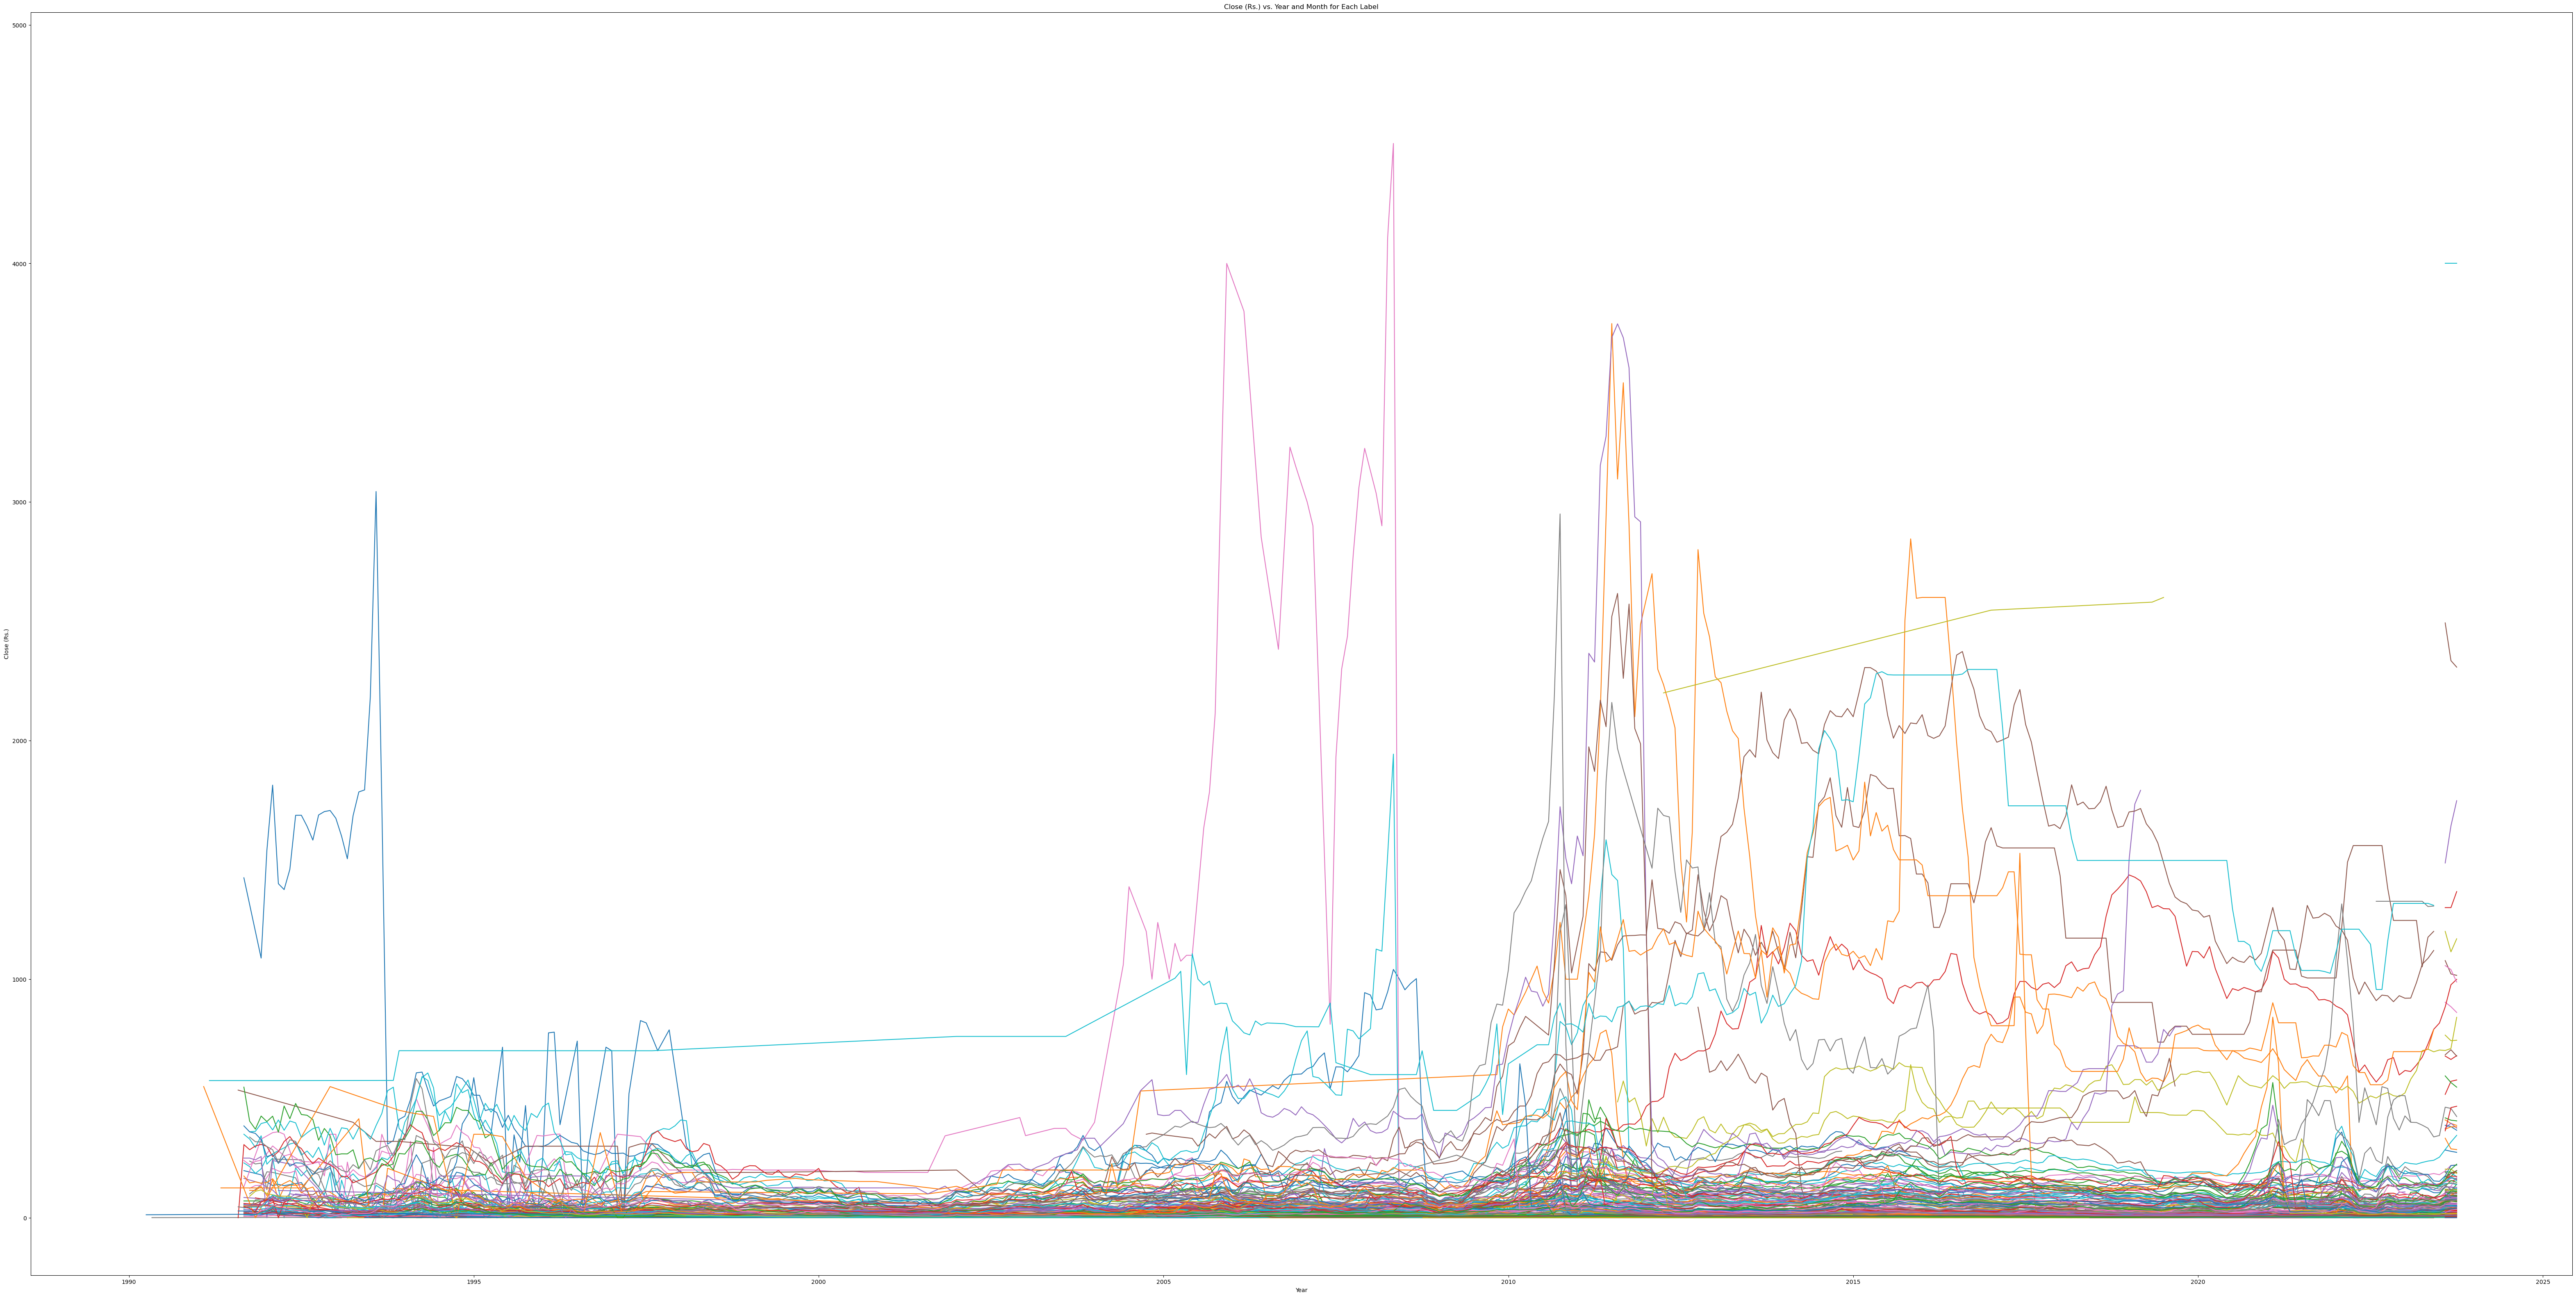

In [3]:
import matplotlib.pyplot as plt
import pandas as pd


# Group the data by 'Label' to plot each label separately
grouped = df_no_duplicates.groupby('Label')

# Initialize the plot
plt.figure(figsize=(80, 40))

# Iterate over each group (label) and plot the data
for label, group_data in grouped:
    plt.plot(group_data['Year'] + group_data['Month'] / 12, group_data['Close (Rs.)'], label=label)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Close (Rs.)')
plt.title('Close (Rs.) vs. Year and Month for Each Label')

# Show the plot
plt.show()

In [4]:
# Create a list of all labels in the dataset
all_labels = df_no_duplicates['Label'].unique()

# Create a reference list of all possible combinations of labels and months
all_months = [i for i in range(1, 13)]  # Months 1 to 12
all_years = [i for i in range(2000, 2021)]  # Years 2000 to 2020
label_month_combinations = [(label, month, year) for label in all_labels for month in all_months for year in all_years]

# Group the dataset by 'Label' and count the number of rows for each label
label_counts = df_no_duplicates.groupby('Label').size()

# Find labels that do not have 251 rows (i.e., missing records)
completed_labels = [label for label in all_labels if label_counts.get(label, 0) >= 344]

# Create a DataFrame for the missing labels
completed_labels_df = pd.DataFrame({'Label': completed_labels})

# Group the dataset by 'Label' and count the number of rows for each label
label_counts = df_no_duplicates['Label'].value_counts().reset_index()
label_counts.columns = ['Label', 'Count']

# Sort the labels by count in descending order
label_counts = label_counts.sort_values(by='Count', ascending=False)

# Filter labels with a count greater than or equal to 300
completed_labels_df = label_counts[label_counts['Count']>=344]

print(completed_labels_df)


         Label  Count
0    JKH.N0000    386
7   COMB.N0000    385
11  HAYC.N0000    385
10  HAYL.N0000    385
1   RICH.N0000    385
8    LMF.N0000    385
9   GHLL.N0000    385
6   SAMP.N0000    385
5   SEYB.N0000    385
4    CTC.N0000    385
3   TILE.N0000    385
2   CFIN.N0000    385
12  CFLB.N0000    384
13  SPEN.N0000    384
14   HNB.N0000    384
15  GRAN.N0000    384
16  ASIR.N0000    384
20  DFCC.N0000    383
19   CIC.N0000    383
18  DIPD.N0000    383
17  TKYO.N0000    383
21  OSEA.N0000    381
22  NEST.N0000    380
23   ACL.N0000    379
24  BOGA.N0000    376
25  ONAL.N0000    375
26   CCS.N0000    369
27  CARG.N0000    366
29  CIND.N0000    365
28   NDB.N0000    365
30  SHOT.N0000    364
31   PDL.N0000    364
32  EAST.N0000    363
33  CINV.N0000    362
34  PALM.N0000    362
35   CIC.X0000    361
36  SEMB.N0000    357
39  BRWN.N0000    356
38  DIST.N0000    356
37  TYRE.N0000    356
40   RCL.N0000    352
41   LWL.N0000    351
42  CFVF.N0000    349
43  GLAS.N0000    348
44   BFL.N

In [5]:
# Assuming 'df' is your DataFrame
greg_data = df_no_duplicates[df_no_duplicates['Label'] == 'BFL.N0000']

# Display the resulting DataFrame
print(greg_data)

           Label  Year  Month  Loan Rate  Election  Close (Rs.)  Inflation  \
2103   BFL.N0000  1994     12       19.7         0    25.097222        4.2   
2165   BFL.N0000  1995      1       20.7         0    26.375000        2.4   
2227   BFL.N0000  1995      2       20.7         0    20.097222        1.0   
2286   BFL.N0000  1995      3       20.7         0    23.715909       -0.9   
2352   BFL.N0000  1995      4       20.7         0    21.458333        0.7   
...          ...   ...    ...        ...       ...          ...        ...   
40816  BFL.N0000  2023      5       16.5         0   134.095238       25.2   
40939  BFL.N0000  2023      6       14.0         0   129.687500       12.0   
41077  BFL.N0000  2023      7       12.0         0   153.500000        6.3   
41352  BFL.N0000  2023      8       12.0         0   172.928571        4.0   
41628  BFL.N0000  2023      9       12.0         0   197.750000        1.3   

        Buy Rate  
2103    49.62000  
2165    49.96000  
2227  

In [6]:
# Filter the DataFrame based on labels and date conditions
filtered_df = df_no_duplicates[(df_no_duplicates['Label'].isin(completed_labels_df['Label'])) & (df_no_duplicates['Year'] >= 1995) & (df_no_duplicates['Month'] >= 1)]

# Display the filtered DataFrame
print(filtered_df)

            Label  Year  Month  Loan Rate  Election  Close (Rs.)  Inflation  \
2162    ACL.N0000  1995      1       20.7         0   190.000000        2.4   
2164   ASIR.N0000  1995      1       20.7         0    33.911765        2.4   
2165    BFL.N0000  1995      1       20.7         0    26.375000        2.4   
2167   BOGA.N0000  1995      1       20.7         0     4.180556        2.4   
2168   BRWN.N0000  1995      1       20.7         0   423.050000        2.4   
...           ...   ...    ...        ...       ...          ...        ...   
41830  SHOT.N0000  2023      9       12.0         0    14.447368        1.3   
41843  SPEN.N0000  2023      9       12.0         0   141.868421        1.3   
41852  TILE.N0000  2023      9       12.0         0    47.631579        1.3   
41854  TKYO.N0000  2023      9       12.0         0    56.300000        1.3   
41859  TYRE.N0000  2023      9       12.0         0    67.168421        1.3   

       Buy Rate  
2162    49.9600  
2164    49.9600

In [7]:
# Export the final_result DataFrame to a CSV file
filtered_df.to_csv('final_stock_value_with_external_factors.csv', index=False)

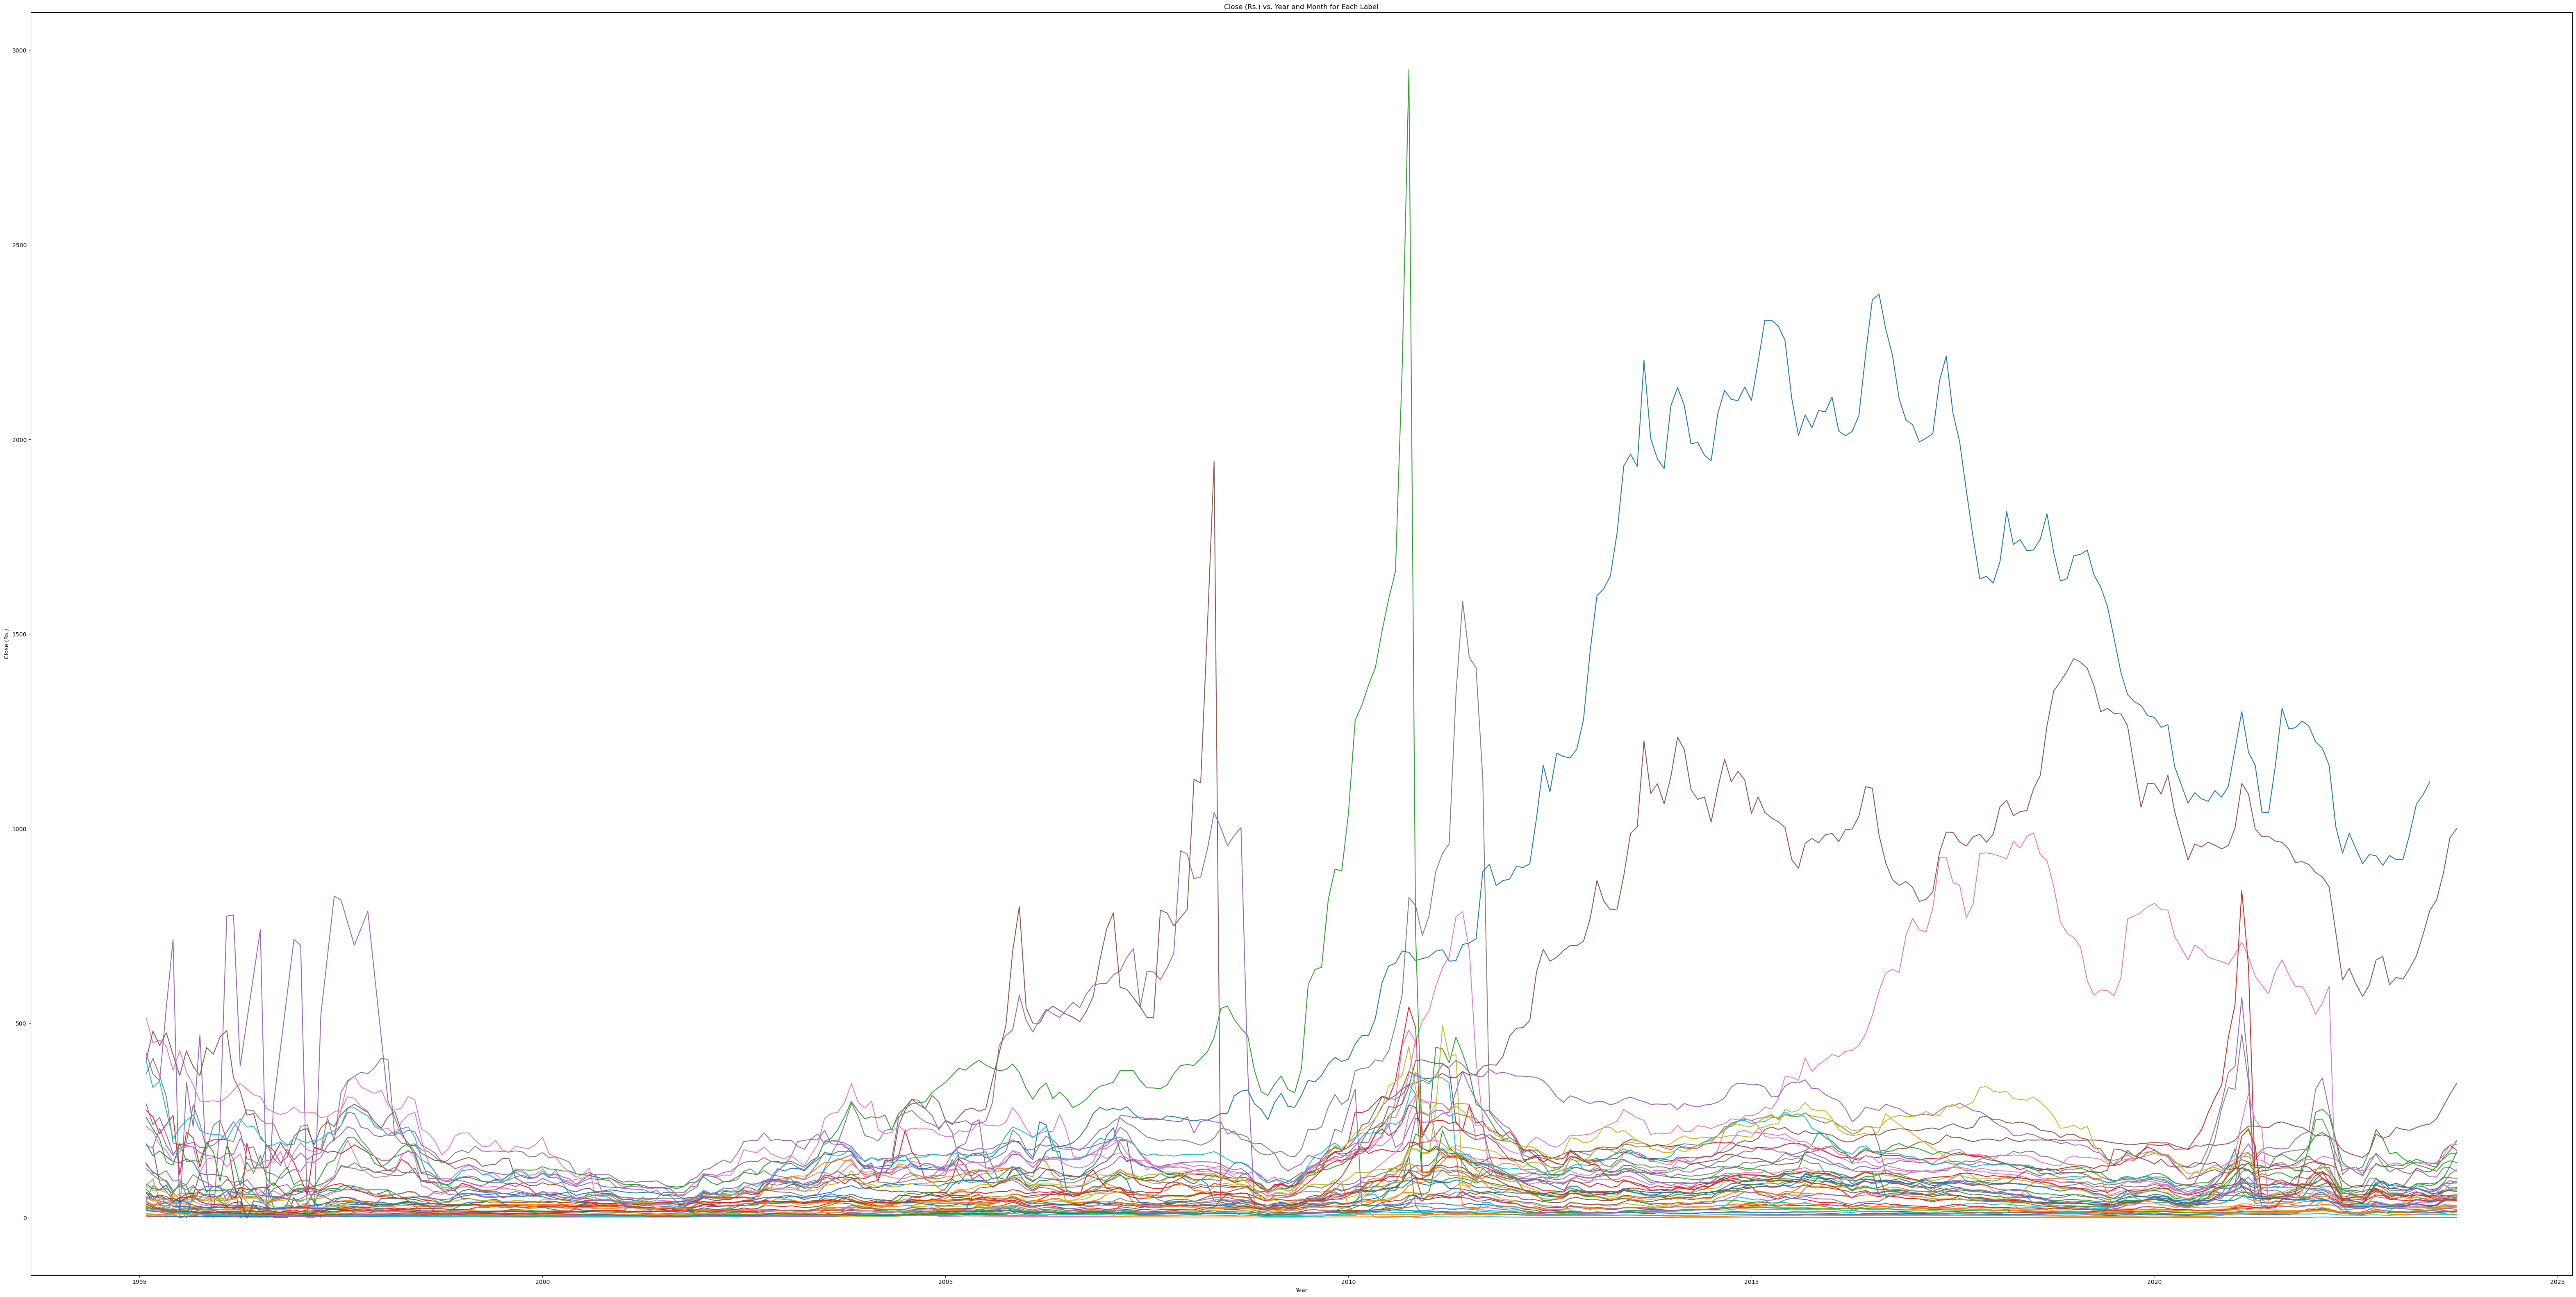

In [8]:
import matplotlib.pyplot as plt
import pandas as pd


# Group the data by 'Label' to plot each label separately
grouped = filtered_df.groupby('Label')

# Initialize the plot
plt.figure(figsize=(80, 40))

# Iterate over each group (label) and plot the data
for label, group_data in grouped:
    plt.plot(group_data['Year'] + group_data['Month'] / 12, group_data['Close (Rs.)'], label=label)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Close (Rs.)')
plt.title('Close (Rs.) vs. Year and Month for Each Label')

# Show the plot
plt.show()

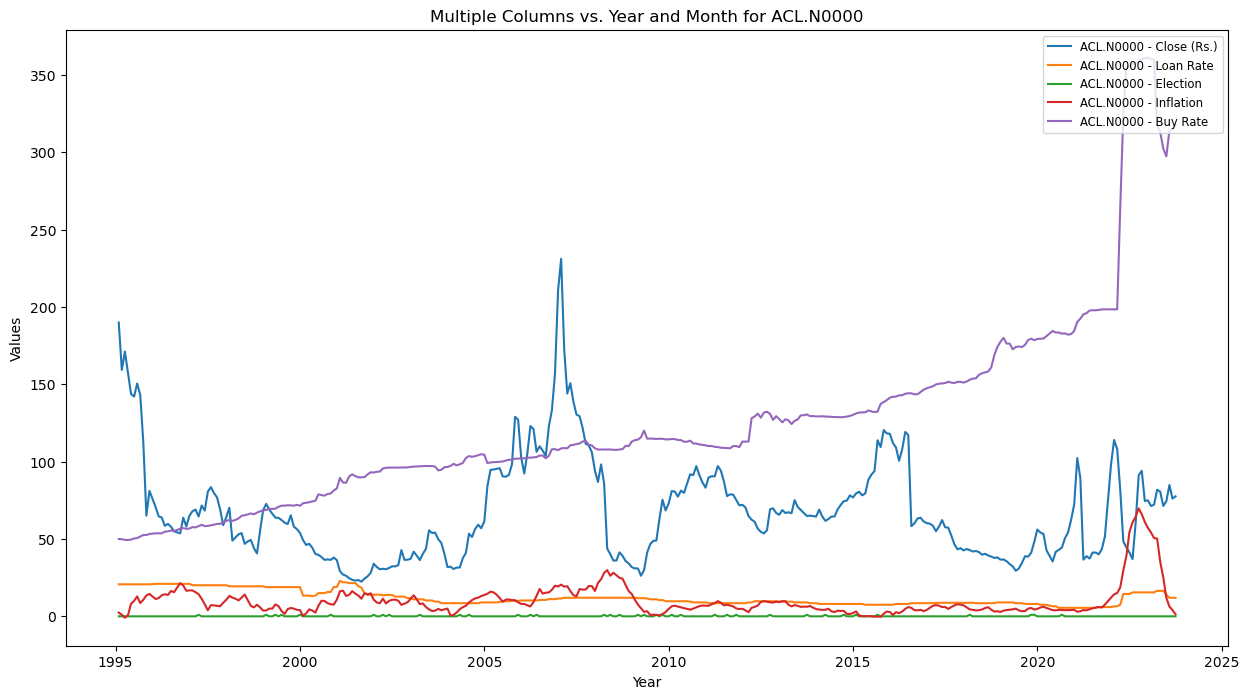

In [9]:
filtered_df = filtered_df[filtered_df['Label'] == 'ACL.N0000']

# Group the data by 'Label' to plot each label separately
grouped = filtered_df.groupby('Label')

# Initialize the plot
plt.figure(figsize=(15, 8))

# Iterate over each group (label) and plot the data for each column
for label, group_data in grouped:
    # Plot 'Close (Rs.)'
    plt.plot(group_data['Year'] + group_data['Month'] / 12, group_data['Close (Rs.)'], label=f'{label} - Close (Rs.)')

    # Plot 'Loan Rate'
    plt.plot(group_data['Year'] + group_data['Month'] / 12, group_data['Loan Rate'], label=f'{label} - Loan Rate')

    # Plot 'Election'
    plt.plot(group_data['Year'] + group_data['Month'] / 12, group_data['Election'], label=f'{label} - Election')

    # Plot 'Inflation'
    plt.plot(group_data['Year'] + group_data['Month'] / 12, group_data['Inflation'], label=f'{label} - Inflation')

    # Plot 'Buy Rate'
    plt.plot(group_data['Year'] + group_data['Month'] / 12, group_data['Buy Rate'], label=f'{label} - Buy Rate')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Multiple Columns vs. Year and Month for ACL.N0000')

# Add a legend to distinguish each label and column
plt.legend(loc='upper right', fontsize='small')

# Show the plot
plt.show()